In [526]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit


In [527]:
df = pd.read_csv("house.csv")
df.head(2)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceUSD
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67


In [528]:
df["Address"].hasnans

True

In [529]:
fdf =df.dropna()
fdf["Address"].hasnans


False

In [530]:
fdf = fdf[pd.to_numeric(fdf['Area'], errors='coerce').notnull()]
fdf['Area'] = fdf['Area'].astype('int')

fdf = fdf[pd.to_numeric(fdf['Room'], errors='coerce').notnull()]
fdf['Room'] = fdf['Room'].astype('int')

fdf = fdf[pd.to_numeric(fdf['Elevator'], errors='coerce').notnull()]
fdf['Elevator'] = fdf['Elevator'].astype('int')




In [531]:
le = preprocessing.LabelEncoder()
le.fit(fdf["Address"])
list(le.classes_)
fdf["Address"] = list(le.transform(fdf["Address"]))

In [532]:
fdf = fdf.loc[fdf["Area"] < 250 ]


In [533]:
msk = np.random.rand(len(fdf)) < 0.8
train = fdf[msk]
test = fdf[~msk]

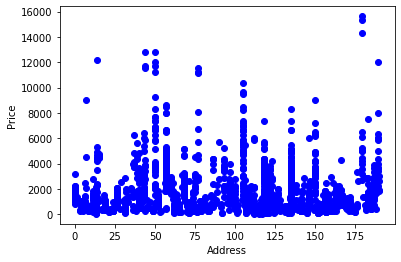

In [534]:
plt.scatter(train.Address, train.PriceUSD/100,  color='blue')
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()

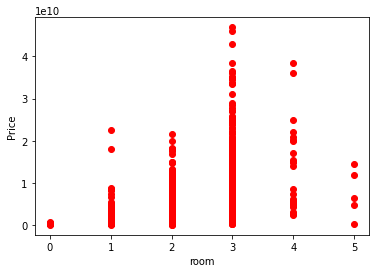

In [535]:
plt.scatter(train.Room, train.Price,  color='red')
plt.xlabel("room")
plt.ylabel("Price")
plt.show()

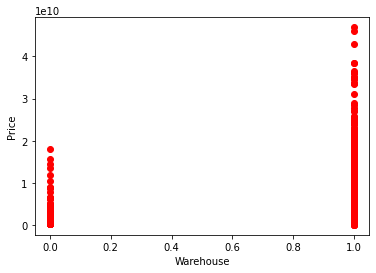

In [536]:
plt.scatter(train.Warehouse, train.Price,  color='red')
plt.xlabel("Warehouse")
plt.ylabel("Price")
plt.show()

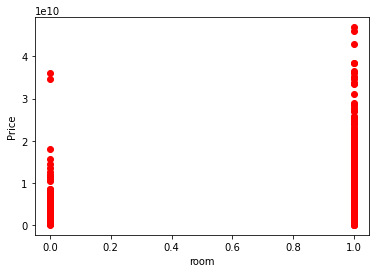

In [537]:
plt.scatter(train.Elevator, train.Price,  color='red')
plt.xlabel("room")
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'Count')

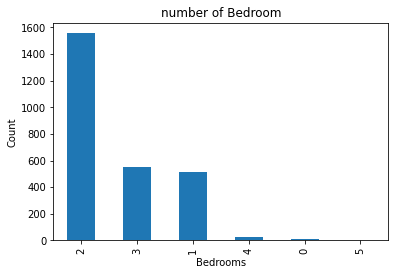

In [538]:
train['Room'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')


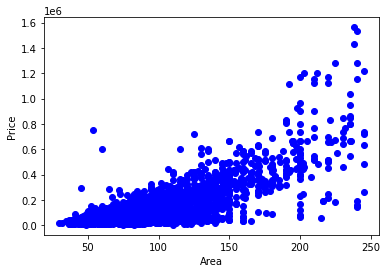

In [539]:
plt.scatter(train.Area, train.PriceUSD,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

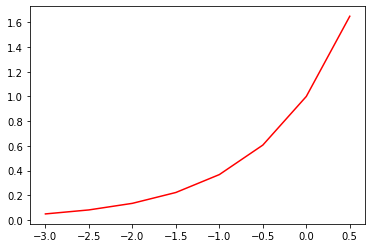

In [540]:
X = np.arange(-3.0, 1.0, .5)
Y= np.exp(X)

plt.plot(X,Y,color='red') 


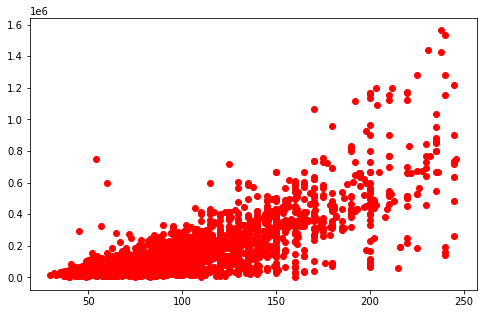

In [541]:
plt.figure(figsize=(8,5))
x_data, y_data = (fdf["Area"].values, fdf["PriceUSD"].values)
plt.plot(x_data, y_data, 'ro')
plt.show()

In [542]:
xdata = fdf[["Area", "Room", "Elevator", "Parking", "Warehouse","Address"]]
ydata = fdf[["PriceUSD"]]

In [543]:
Xtrain, Xtest, ytrain, ytest= train_test_split(xdata, ydata, test_size = 0.2)

In [544]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
x = np.asanyarray(Xtrain)
y = np.asanyarray(ytrain)

reg.fit(x,y)
reg.coef_


array([[ 3.74793459e+03, -4.34130104e+04,  6.98488393e+03,
         1.44496941e+04,  1.76133237e+04, -2.96033310e+01]])

In [545]:
x1 = np.asanyarray(Xtest)
y1 = np.asanyarray(ytest)

reg.predict(Xtest)
reg.score(x1,y1)


0.6294300318091954

In [546]:
def func(a, b ,c ,x):
    y = a * np.exp(b * x) + c

In [547]:
from sklearn.linear_model import RidgeCV
from sklearn.datasets import load_diabetes
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
ridge_reg = RidgeCV(alphas=alphas, cv=None, store_cv_values=True)
ridge_reg.fit(x,y)

ridge_reg.score(Xtest,ytest)


0.6294131862576593

Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

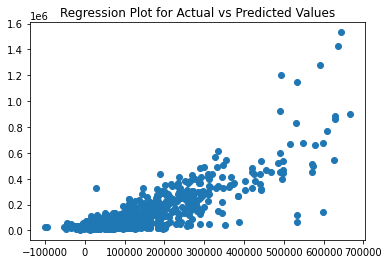

In [548]:
g = plt.scatter(x=ridge_reg.predict(Xtest), y=ytest)
plt.title('Regression Plot for Actual vs Predicted Values')

In [549]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(Xtrain)
train_x_poly

array([[1.0000e+00, 8.3000e+01, 2.0000e+00, ..., 1.0000e+00, 9.7000e+01,
        9.4090e+03],
       [1.0000e+00, 1.0500e+02, 2.0000e+00, ..., 1.0000e+00, 1.6300e+02,
        2.6569e+04],
       [1.0000e+00, 1.5000e+02, 3.0000e+00, ..., 1.0000e+00, 1.1800e+02,
        1.3924e+04],
       ...,
       [1.0000e+00, 9.6000e+01, 2.0000e+00, ..., 1.0000e+00, 1.4600e+02,
        2.1316e+04],
       [1.0000e+00, 7.2000e+01, 2.0000e+00, ..., 1.0000e+00, 1.2200e+02,
        1.4884e+04],
       [1.0000e+00, 5.7000e+01, 1.0000e+00, ..., 1.0000e+00, 1.8300e+02,
        3.3489e+04]])

In [550]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, ytrain)

print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 5.97580441e-09 -3.30498474e+03  3.81349857e+04 -1.28853334e+03
  -1.87885119e+04 -1.31923615e+04 -8.08998198e+02  1.82658470e+01
  -1.27004465e+02  1.72798227e+03  3.10075094e+02  9.36268525e+02
  -2.84082522e-01 -1.82098425e+02 -5.38566982e+04  4.24381929e+03
  -2.79463102e+04  2.04988549e+02 -1.28853334e+03  1.85761394e+04
   1.39841107e+04 -3.97917379e+02 -1.87885119e+04  1.77534030e+04
   8.46015534e+01 -1.31923615e+04 -9.93365886e+01  3.99152255e+00]]
Intercept:  [146760.82096916]


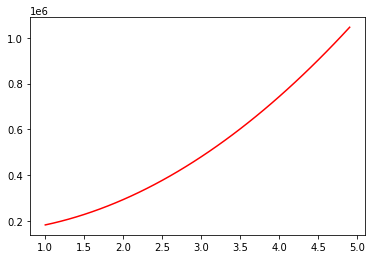

In [551]:
XX = np.arange(1.0, 5.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )


In [552]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(Xtest)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - ytest)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - ytest) ** 2))
print("R2-score: %.2f" % r2_score(ytest,test_y_ ) )

Mean absolute error: 57135.84
Residual sum of squares (MSE): 8876882708.17
R2-score: 0.72


c:\Python38\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Python38\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


 بخاطر پراکندگی دیتا و توی مسله ذکر نشده که اون ها فیلتر بشن و ممکن هست دیتای واقعی و درست باشن توی هر بار ران با توجه به اینکه دیتای مختلفی برای تست انتخاب میشه r2 متفاوت میشع